In [273]:
#Importing the important libraries
import pandas as pd
import geopandas as gp
# Folium for plotting maps
import folium
from shapely import Polygon 

In [274]:
df = pd.read_pickle("data/poi/poi_prepared.pickle")

In [275]:
df

,amenity,geometry,name,category,latitude,longitude,public_transport,wheelchair,hex_7,hex_8,hex_9,pol_7,pol_8,pol_9
osmid,,,,,,,,,,,,,,
258490031,parking,POINT (-87.64385 41.95123),NaN,parking,41.951227,-87.643847,NaN,NaN,872664c14ffffff,882664c145fffff,892664c144fffff,"POLYGON ((-87.63414405293 41.96445315471353, -...",POLYGON ((-87.64084295487153 41.95798939959579...,POLYGON ((-87.64331225830723 41.95215193946119...
269449042,parking_entrance,POINT (-87.61506 41.85869),NaN,parking,41.858689,-87.615058,NaN,NaN,872664c1bffffff,882664c1b1fffff,892664c1b03ffff,"POLYGON ((-87.61820944356228 41.8710984903598,...",POLYGON ((-87.61347038938916 41.86360034164272...,POLYGON ((-87.61470441038506 41.86068519734808...
269450074,parking_entrance,POINT (-87.58421 41.79174),NaN,parking,41.791742,-87.584208,NaN,NaN,872664cc5ffffff,882664cc59fffff,892664cc583ffff,POLYGON ((-87.5937067068291 41.798228672497444...,POLYGON ((-87.58229602405846 41.79718226760902...,POLYGON ((-87.58353033145704 41.79426977332311...
269688947,post_box,POINT (-87.77220 42.00407),NaN,other,42.004073,-87.772198,NaN,NaN,872664d9effffff,882664d9e1fffff,892664d9e0fffff,"POLYGON ((-87.7773181551225 42.01982017726515,...",POLYGON ((-87.77253980099742 42.01231761635508...,POLYGON ((-87.77499453418736 42.00647434498914...
270863340,parking_entrance,POINT (-87.61564 41.86421),NaN,parking,41.864208,-87.615638,NaN,NaN,872664c1bffffff,882664c1bdfffff,892664c1bc7ffff,"POLYGON ((-87.61820944356228 41.8710984903598,...","POLYGON ((-87.61820944356228 41.8710984903598,...","POLYGON ((-87.6164567332772 41.86589170573153,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13621412,NaN,"POLYGON ((-87.66859 41.91735, -87.66895 41.917...",NaN,public_transport,41.917203,-87.668448,platform,NaN,872664c12ffffff,882664cac9fffff,892664cac93ffff,"POLYGON ((-87.6723729663648 41.93963771855481,...","POLYGON ((-87.6695545771894 41.9181739690806, ...","POLYGON ((-87.6695545771894 41.9181739690806, ..."
13621413,NaN,"POLYGON ((-87.66793 41.91671, -87.66797 41.916...",NaN,public_transport,41.917215,-87.668182,platform,NaN,872664c12ffffff,882664cac9fffff,892664cac93ffff,"POLYGON ((-87.6723729663648 41.93963771855481,...","POLYGON ((-87.6695545771894 41.9181739690806, ...","POLYGON ((-87.6695545771894 41.9181739690806, ..."
13621414,NaN,"POLYGON ((-87.66801 41.91728, -87.66800 41.917...",NaN,public_transport,41.917277,-87.668066,platform,NaN,872664c12ffffff,882664cac9fffff,892664cac93ffff,"POLYGON ((-87.6723729663648 41.93963771855481,...","POLYGON ((-87.6695545771894 41.9181739690806, ...","POLYGON ((-87.6695545771894 41.9181739690806, ..."


In [276]:
# Building a dictionary/Series to get Polygons from hexcodes
Series_9 = df[["hex_9", "pol_9"]].reset_index().drop(columns="osmid").set_index("hex_9").drop_duplicates()["pol_9"]
Series_8 = df[["hex_8", "pol_8"]].reset_index().drop(columns="osmid").set_index("hex_8").drop_duplicates()["pol_8"]
Series_7 = df[["hex_7", "pol_7"]].reset_index().drop(columns="osmid").set_index("hex_7").drop_duplicates()["pol_7"]
hex_series = pd.concat([Series_9, Series_8, Series_7])

In [277]:
# Creating Counts for the Categories
groupedDF_9 = pd.DataFrame(df.groupby(["hex_9", "category"]).count()["hex_8"]).reset_index().set_index("hex_9").rename(columns = {"hex_8": "count"})
groupedDF_8 = pd.DataFrame(df.groupby(["hex_8", "category"]).count()["hex_7"]).reset_index().set_index("hex_8").rename(columns = {"hex_7": "count"})
groupedDF_7 = pd.DataFrame(df.groupby(["hex_7", "category"]).count()["hex_9"]).reset_index().set_index("hex_7").rename(columns = {"hex_9": "count"})

# Appending Geometry
groupedDF_9 = groupedDF_9.merge(hex_series.to_frame(), left_index=True, right_index=True).rename(columns={0: "geometry"})
groupedDF_8 = groupedDF_8.merge(hex_series.to_frame(), left_index=True, right_index=True).rename(columns={0: "geometry"})
groupedDF_7 = groupedDF_7.merge(hex_series.to_frame(), left_index=True, right_index=True).rename(columns={0: "geometry"})

In [278]:
groupedDF_9

,category,count,geometry
hex_9,,,
89266419027ffff,parking,4,POLYGON ((-87.54593556032714 41.66885830606152...
8926641902bffff,parking,3,POLYGON ((-87.55311075150213 41.67052779990198...
8926641902fffff,parking,1,POLYGON ((-87.55013966122083 41.66823930466431...
89266419037ffff,parking,2,POLYGON ((-87.54470211903266 41.67176593053346...
89266419073ffff,parking,1,POLYGON ((-87.55905374825679 41.67510470128267...
...,...,...,...
89275936dcfffff,public_transport,1,POLYGON ((-87.8093791988081 42.009550896444246...
89275936dd3ffff,gastronomy,2,POLYGON ((-87.80692886821576 42.01539487277240...
89275936dd3ffff,public_transport,1,POLYGON ((-87.80692886821576 42.01539487277240...


In [279]:
x = groupedDF_9[groupedDF_9["category"] == "parking"]

In [280]:
x

,category,count,geometry
hex_9,,,
89266419027ffff,parking,4,POLYGON ((-87.54593556032714 41.66885830606152...
8926641902bffff,parking,3,POLYGON ((-87.55311075150213 41.67052779990198...
8926641902fffff,parking,1,POLYGON ((-87.55013966122083 41.66823930466431...
89266419037ffff,parking,2,POLYGON ((-87.54470211903266 41.67176593053346...
89266419073ffff,parking,1,POLYGON ((-87.55905374825679 41.67510470128267...
...,...,...,...
89275936d23ffff,parking,1,POLYGON ((-87.79859113209436 41.99747245688001...
89275936d4bffff,parking,3,POLYGON ((-87.81906109803519 42.00536334831435...
89275936d4fffff,parking,3,"POLYGON ((-87.8160571626749 42.00307452279645,..."


In [284]:
# Erzeugen einer GeoJson für Plotten mit Folium
gdf = gp.GeoDataFrame(x, geometry='geometry', crs = "EPSG:4326")
y = gdf.to_json()

In [286]:
m = folium.Map([41.88065, -87.62642], zoom_start=10)

folium.GeoJson(
    folium.GeoJson(y,
               tooltip=folium.GeoJsonTooltip(fields=['count'])
              ).add_to(m)
)

m

ValueError: Cannot render objects with any missing geometries: <folium.features.GeoJson object at 0x000001ED40131AE0>

In [282]:
m = folium.Map([41.88065, -87.62642], zoom_start=10)

folium.Choropleth(
            geo_data=y,
            name="choropleth",
            data=x,
            columns=["hex_9", "count"],  #Here we tell folium to get the county fips and plot new_cases_7days metric for each county
            key_on='feature.properties.hex_9', #Here we grab the geometries/county boundaries from the geojson file using the key 'coty_code' which is the same as county fips
            fill_opacity=0.7,
            line_opacity=0.2,
            fill_color="YlGn",
            legend_name='Parkplätze', #title of the legend
            line_color='black').add_to(m) 

m

KeyError: "None of ['hex_9'] are in the columns"

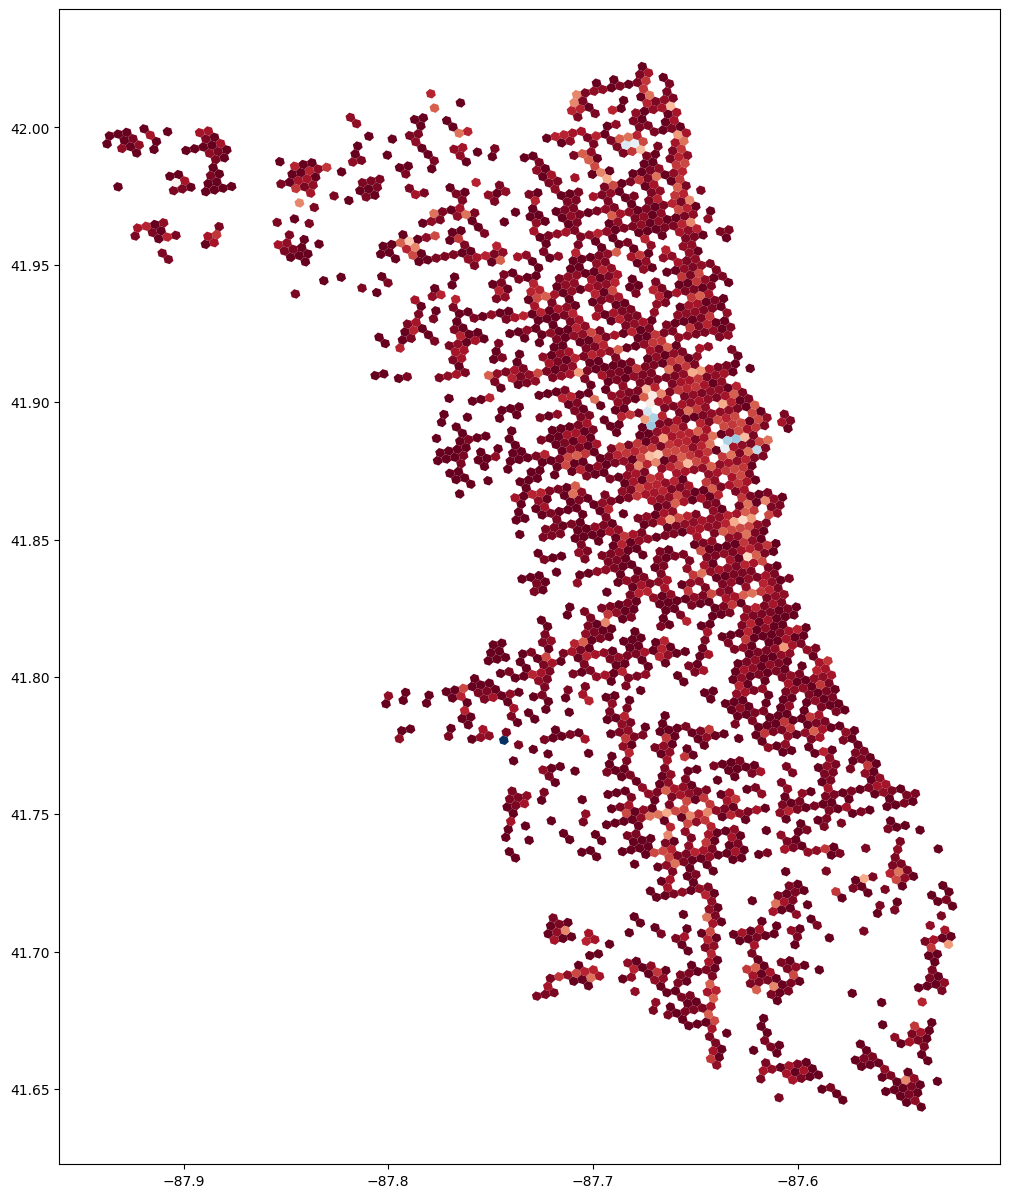

In [283]:
ax = gdf.plot(figsize=(15, 15), column='count', cmap='RdBu')

In [ ]:
## Neuer Versuch diesmal mit nem Tutorial
# https://medium.com/@ransaka/how-to-create-a-choropleth-map-using-uber-h3-plotly-python-c65555744c87

